<a href="https://colab.research.google.com/github/AnamAtr/Titanic-Dataset-Data-Cleaning-and-Preprocessing/blob/main/Data_cleaning_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [ ]:
import pandas as pd
import numpy as np


In [42]:
df=pd.read_csv('/content/Titanic-Dataset.csv')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
summary=df.describe()


In [46]:
df['Survived'] = df['Survived'].replace({0: 'No', 1: 'Yes'})


In [54]:
# Replace Pclass values with descriptive labels
df['Pclass'] = df['Pclass'].replace({
    1: 'First Class',
    2: 'Second Class',
    3: 'Third Class'})

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Handle missing value
#AGE
from sklearn.impute import SimpleImputer
age_imputer=SimpleImputer(strategy='median')
df['Age']=age_imputer.fit_transform(df[['Age']])

In [49]:
#Cabin
# Check if 'Cabin' column exists before dropping
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'],inplace=True) # Changed 'column' to 'columns'
else:
    print("Column 'Cabin' is already dropped")  #If the code is executed again to remind user.

embarked_imputer =SimpleImputer(strategy='most_frequent')
# Reshape the output to a 1D array
df['Embarked']=embarked_imputer.fit_transform(df[['Embarked']]).ravel()

In [51]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Now use the instance for encoding
df['Sex'] = encoder.fit_transform(df['Sex'])


In [ ]:
df.to_csv("Titanic_cleaned_data.csv",index=False)

In [52]:
# Normalization
scaler = StandardScaler()
numerical_col=['Age','Fare','SibSp','Parch']
df[numerical_col]=scaler.fit_transform(df[numerical_col])


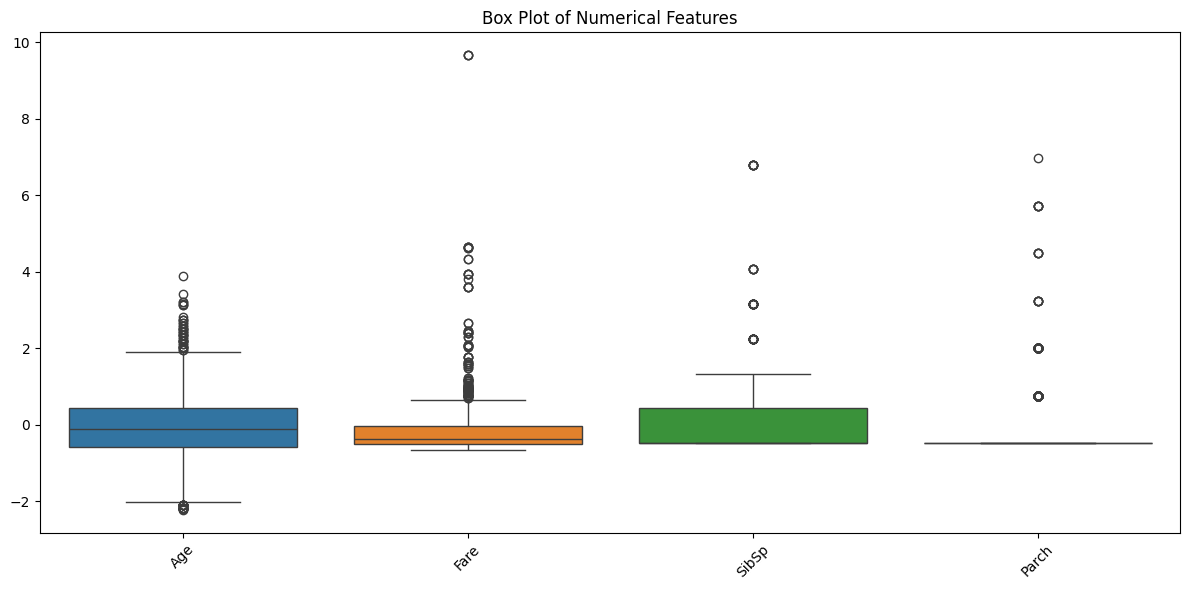

In [ ]:
#REMOVE OUTLIER
plt.figure(figsize=(12,6)) # Moved 'figuresize' inside 'figsize' parameter
sns.boxplot(data=df[numerical_col]) # Changed numerical_cols to numerical_col
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("cleaned_data.csv",index=False)